VALUE ITERATION:
Value Function (Value Iteration):
[[0.729      0.729      0.729      0.729      0.6561     0.59049
  0.531441   0.4782969  0.43046721]
 [0.729      0.81       0.81       0.81       0.6561     0.59049
  0.531441   0.4782969  0.43046721]
 [0.729      0.81       0.81       0.81       0.59049    0.59049
  0.531441   0.4782969  0.43046721]
 [0.729      0.81       0.81       0.81       0.531441   0.531441
  0.531441   0.4782969  0.43046721]
 [0.6561     0.6561     0.59049    0.531441   0.4782969  0.4782969
  0.4782969  0.4782969  0.43046721]
 [0.59049    0.59049    0.59049    0.531441   0.4782969  0.81
  0.81       0.81       0.81      ]
 [0.531441   0.531441   0.531441   0.531441   0.4782969  0.81
  0.9        0.9        0.9       ]
 [0.4782969  0.4782969  0.4782969  0.4782969  0.4782969  0.81
  0.9        1.         1.        ]
 [0.43046721 0.43046721 0.43046721 0.43046721 0.43046721 0.81
  0.9        1.         0.        ]]


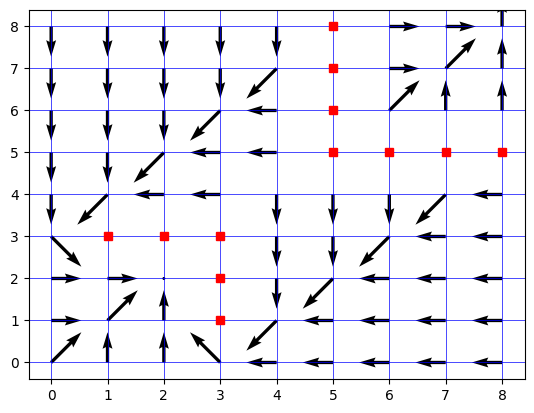


---------------------------------

POLICY ITERATION:
Value Function (Policy Iteration):
[[0.729      0.729      0.729      0.729      0.6561     0.59049
  0.531441   0.4782969  0.43046721]
 [0.729      0.81       0.81       0.81       0.6561     0.59049
  0.531441   0.4782969  0.43046721]
 [0.729      0.81       0.81       0.81       0.59049    0.59049
  0.531441   0.4782969  0.43046721]
 [0.729      0.81       0.81       0.81       0.531441   0.531441
  0.531441   0.4782969  0.43046721]
 [0.6561     0.6561     0.59049    0.531441   0.4782969  0.4782969
  0.4782969  0.4782969  0.43046721]
 [0.59049    0.59049    0.59049    0.531441   0.4782969  0.81
  0.81       0.81       0.81      ]
 [0.531441   0.531441   0.531441   0.531441   0.4782969  0.81
  0.9        0.9        0.9       ]
 [0.4782969  0.4782969  0.4782969  0.4782969  0.4782969  0.81
  0.9        1.         1.        ]
 [0.43046721 0.43046721 0.43046721 0.43046721 0.43046721 0.81
  0.9        1.         0.        ]]


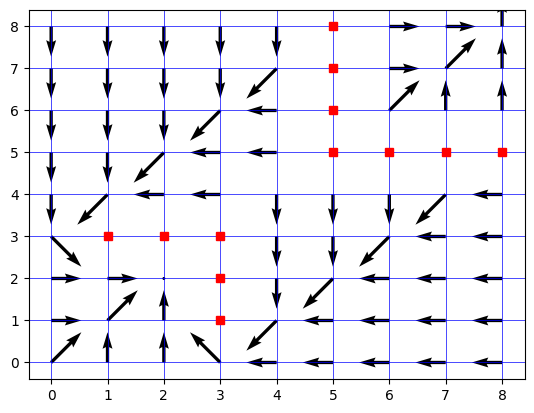

In [8]:
import numpy as np
import matplotlib.pyplot as plt

'''value and policy iteration with quiver plot'''
class ValueIteration:
    def __init__(self, grid_size, goal_position, actions, transition, rewards, discount_factor, theta):
        self.grid_size = grid_size
        self.goal_position = goal_position
        self.actions = actions
        self.transition = transition
        self.rewards = rewards
        self.discount_factor = discount_factor
        self.theta = theta
        self.value_function = np.zeros(grid_size)
        self.policy = {state: np.random.choice(actions) for state in np.ndindex(grid_size)}

    def value_iteration(self):
        while True:
            delta = 0
            for state in np.ndindex(self.grid_size):
                if state == self.goal_position:
                    continue

                v = self.value_function[state]
                max_value = max(
                    self.rewards[self.transition(state, action)] + self.discount_factor * self.value_function[self.transition(state, action)]
                    for action in self.actions
                )
                self.value_function[state] = max_value
                delta = max(delta, abs(v - max_value))

            if delta < self.theta:
                break

        self._update_policy()
        return self.value_function, self.policy

    def _update_policy(self):
        for state in np.ndindex(self.grid_size):
            action_values = {
                action: self.rewards[self.transition(state, action)] + self.discount_factor * self.value_function[self.transition(state, action)]
                for action in self.actions
            }
            self.policy[state] = max(action_values, key=action_values.get)


class PolicyIteration:
    def __init__(self, grid_size, goal_position, actions, transition, rewards, discount_factor, theta):
        self.grid_size = grid_size
        self.goal_position = goal_position
        self.actions = actions
        self.transition = transition
        self.rewards = rewards
        self.discount_factor = discount_factor
        self.theta = theta
        self.value_function = np.zeros(grid_size)
        self.policy = {state: np.random.choice(actions) for state in np.ndindex(grid_size)}

    def policy_iteration(self):
        while True:
            self._policy_evaluation()
            if self._policy_improvement():
                break

        return self.value_function, self.policy

    def _policy_evaluation(self):
        while True:
            delta = 0
            for state in np.ndindex(self.grid_size):
                if state == self.goal_position:
                    continue

                v = self.value_function[state]
                action = self.policy[state]
                next_state = self.transition(state, action)
                self.value_function[state] = self.rewards[next_state] + self.discount_factor * self.value_function[next_state]
                delta = max(delta, abs(v - self.value_function[state]))

            if delta < self.theta:
                break

    def _policy_improvement(self):
        policy_stable = True
        for state in np.ndindex(self.grid_size):
            if state == self.goal_position:
                continue

            old_action = self.policy[state]
            action_values = {
                action: self.rewards[self.transition(state, action)] + self.discount_factor * self.value_function[self.transition(state, action)]
                for action in self.actions
            }
            best_action = max(action_values, key=action_values.get)
            self.policy[state] = best_action

            if old_action != best_action:
                policy_stable = False

        return policy_stable


def transition(state, action):
    tunnel_in = (2, 2)
    tunnel_out = (6, 6)
    walls = {(3, 1), (3, 2), (3, 3), (1, 3), (2, 3), (5, 5), (6, 5), (7, 5), (5, 8), (5, 6), (5, 7), (8, 5)}
    grid_size = (9, 9)

    x, y = state
    directions = {
        'up': (x - 1, y),
        'down': (x + 1, y),
        'left': (x, y - 1),
        'right': (x, y + 1),
        'up-left': (x - 1, y - 1),
        'up-right': (x - 1, y + 1),
        'down-left': (x + 1, y - 1),
        'down-right': (x + 1, y + 1),
        'stay': (x, y),
    }

    next_state = directions[action]
    next_state = (max(0, min(next_state[0], grid_size[0] - 1)),
                  max(0, min(next_state[1], grid_size[1] - 1)))

    if next_state == tunnel_in:
        next_state = tunnel_out

    if next_state in walls:
        next_state = state

    return next_state


def plot_policy(policy, grid_size, walls):
    '''
    Plot policy with red squares for walls

    Args:
    policy: dict, policy
    grid_size: tuple, grid size
    walls: list, wall coordinates

    Returns:
    None
    '''
    X, Y = np.meshgrid(range(grid_size[1]), range(grid_size[0]))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)

    action_vectors = {
        'up': (0, -1),
        'down': (0, 1),
        'left': (-1, 0),
        'right': (1, 0),
        'up-left': (-1, -1),
        'up-right': (1, -1),
        'down-left': (-1, 1),
        'down-right': (1, 1),
        'stay': (0, 0)
    }

    for state, action in policy.items():
        if state not in walls:
            dx, dy = action_vectors[action]
            U[state], V[state] = dx, dy

    plt.figure()
    plt.grid(visible=True, color='b', linestyle='-', linewidth=0.5)
    plt.quiver(X, Y, U, V)

    for wall in walls:
        plt.plot(wall[1], wall[0], 'rs')

    plt.show()


def main():
    grid_size = (9, 9)
    goal_position = (8, 8)
    rewards = np.zeros(grid_size)
    rewards[goal_position] = 1

    walls = [(3, 1), (3, 2), (3, 3), (1, 3), (2, 3), (5, 5), (6, 5), (7, 5), (5, 8), (5, 6), (5, 7), (8, 5)]
    actions = ['up', 'down', 'left', 'right', 'up-left', 'up-right', 'down-left', 'down-right', 'stay']

    print("VALUE ITERATION:")
    value_iteration = ValueIteration(grid_size, goal_position, actions, transition, rewards, discount_factor=0.9, theta=0.01)
    value_function_vi, policy_vi = value_iteration.value_iteration()
    print("Value Function (Value Iteration):")
    print(value_function_vi)
    plot_policy(policy_vi, grid_size, walls)

    print("\n---------------------------------\n")

    print("POLICY ITERATION:")
    policy_iteration = PolicyIteration(grid_size, goal_position, actions, transition, rewards, discount_factor=0.9, theta=0.01)
    value_function_pi, policy_pi = policy_iteration.policy_iteration()
    print("Value Function (Policy Iteration):")
    print(value_function_pi)
    plot_policy(policy_pi, grid_size, walls)


if __name__ == "__main__":
    main()